We got weather information for Chicago from May 2022 to April 2023 from the WeatherSpark website. This site gives detailed weather reports, including things like temperature and rain, for places all around the world. We used it to find out what the weather was like in Chicago during this time. This information will help us look into how the weather might affect Bike usage in the city

In [19]:
import pandas as pd

df = pd.read_csv('/content/combined-divvy-tripdata.csv')
df['started_at'] = pd.to_datetime(df['started_at'])

# Monthly average temperatures for Chicago from May 2022 to April 2023 got from the
# https://weatherspark.com/h/s/14091/2023/0/Historical-Weather-Spring-2023-in-Chicago-Illinois-United-States#Figures-Temperature
monthly_avg_temperatures = [65, 75, 82, 77, 68, 53, 45, 32, 27, 29, 31, 42]

df['month'] = df['started_at'].dt.month
df['year'] = df['started_at'].dt.year

def assign_temperature(row):
    index = (row['month'] - 5) % 12
    if row['year'] == 2022 and row['month'] < 5:
        index = 12
    return monthly_avg_temperatures[index]

df['weather'] = df.apply(assign_temperature, axis=1)
df.drop(columns=['month', 'year'], inplace=True)
print(df)


                  ride_id  rideable_type          started_at  \
0        EC2DE40644C6B0F4   classic_bike 2022-05-23 23:06:58   
1        1C31AD03897EE385   classic_bike 2022-05-11 08:53:28   
2        1542FBEC830415CF   classic_bike 2022-05-26 18:36:28   
3        6FF59852924528F8   classic_bike 2022-05-10 07:30:07   
4        483C52CAAE12E3AC   classic_bike 2022-05-10 17:31:56   
...                   ...            ...                 ...   
5853083  8B441A6C436E9900   classic_bike 2023-04-29 21:20:21   
5853084  3980D64BE11540F1   classic_bike 2023-04-24 09:16:05   
5853085  3EF4B49FF7DAA02C   classic_bike 2023-04-18 07:53:51   
5853086  210B2ED6583DC231   classic_bike 2023-04-29 07:33:55   
5853087  D29CB39B9E3FC46A  electric_bike 2023-04-18 08:00:32   

                    ended_at                 start_station_name  \
0        2022-05-23 23:40:19             Wabash Ave & Grand Ave   
1        2022-05-11 09:31:22  DuSable Lake Shore Dr & Monroe St   
2        2022-05-26 18:58:18  

In [28]:
print(df.columns)

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'weather', 'duration'],
      dtype='object')


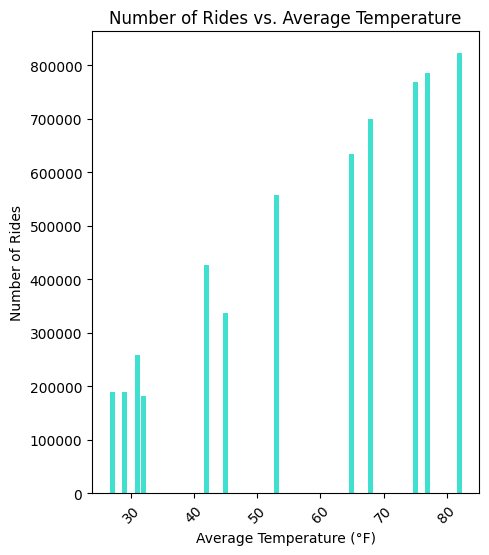

In [30]:
import matplotlib.pyplot as plt
import numpy as np

rides_per_weather = df.groupby('weather')['ride_id'].count().reset_index()

# Plot
plt.figure(figsize=(5, 6))
plt.bar(rides_per_weather['weather'], rides_per_weather['ride_id'], color='turquoise')
plt.title('Number of Rides vs. Average Temperature')
plt.xlabel('Average Temperature (°F)')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.show()
